In [1]:
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
import ssl
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline

from utils import fetch_data, split_train_test, split_train_test_by_id



ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
fetch_data(HOUSING_URL, HOUSING_PATH)
df = pd.read_csv(os.path.join(HOUSING_PATH, "housing.csv"))
df = df.reset_index()

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  float64
 7   households          20640 non-null  float64
 8   median_income       20640 non-null  float64
 9   median_house_value  20640 non-null  float64
 10  ocean_proximity     20640 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,5958.399114,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,5159.750000,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,10319.500000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,15479.250000,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

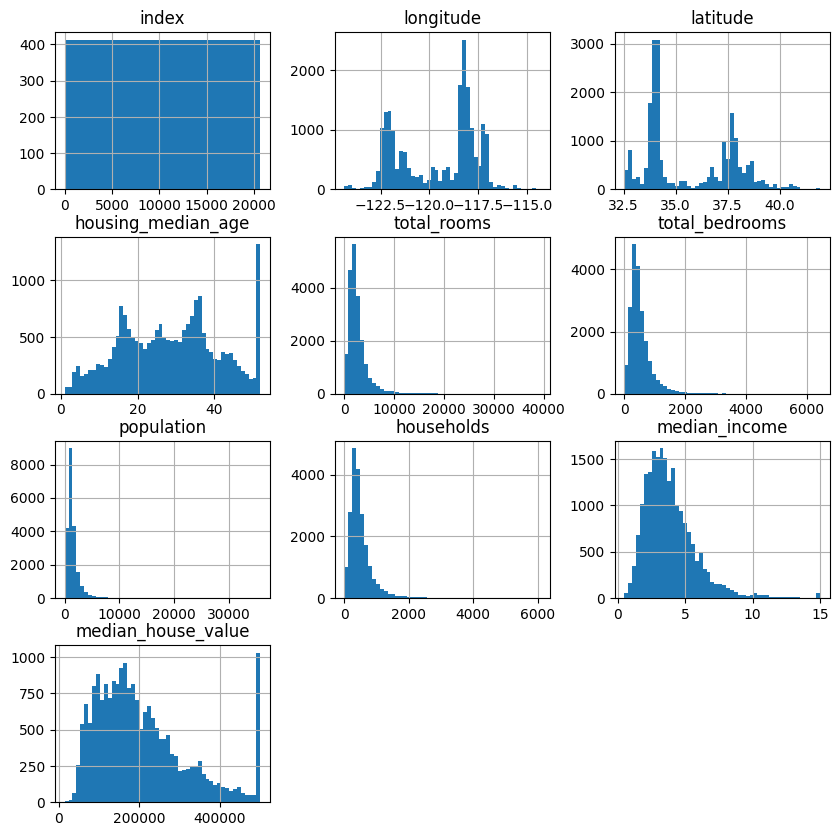

In [5]:
df.hist(bins=50, figsize=(10, 10))

In [6]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

In [7]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
i = 0
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

housing = strat_train_set.copy()


<Axes: xlabel='longitude', ylabel='latitude'>

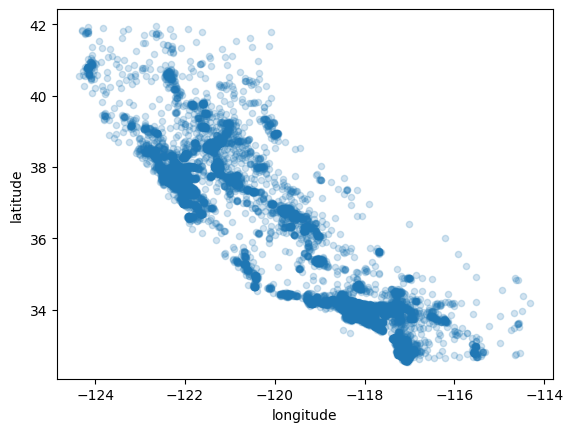

In [8]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

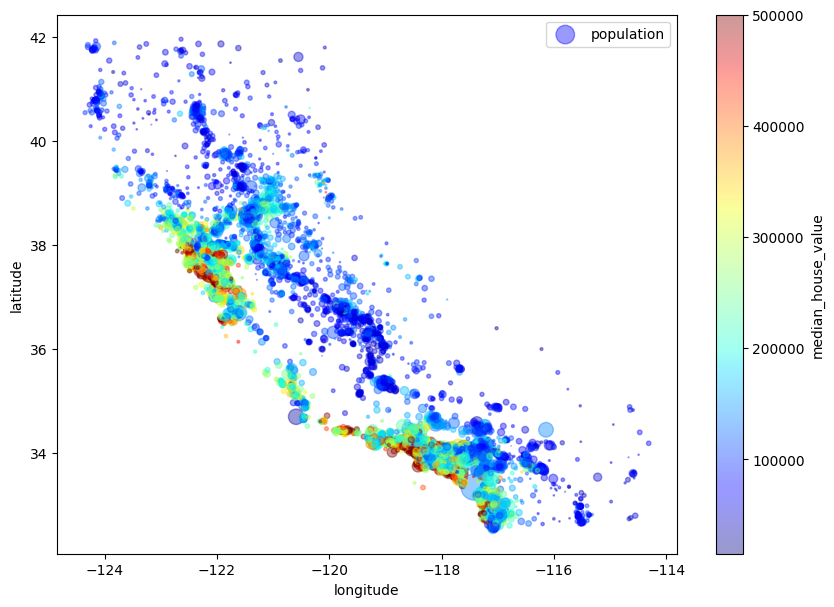

In [9]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"] / 100,
    label="population",
    figsize=(10, 7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

In [10]:
# Remove categorical features before calculating correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
index                 0.072086
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

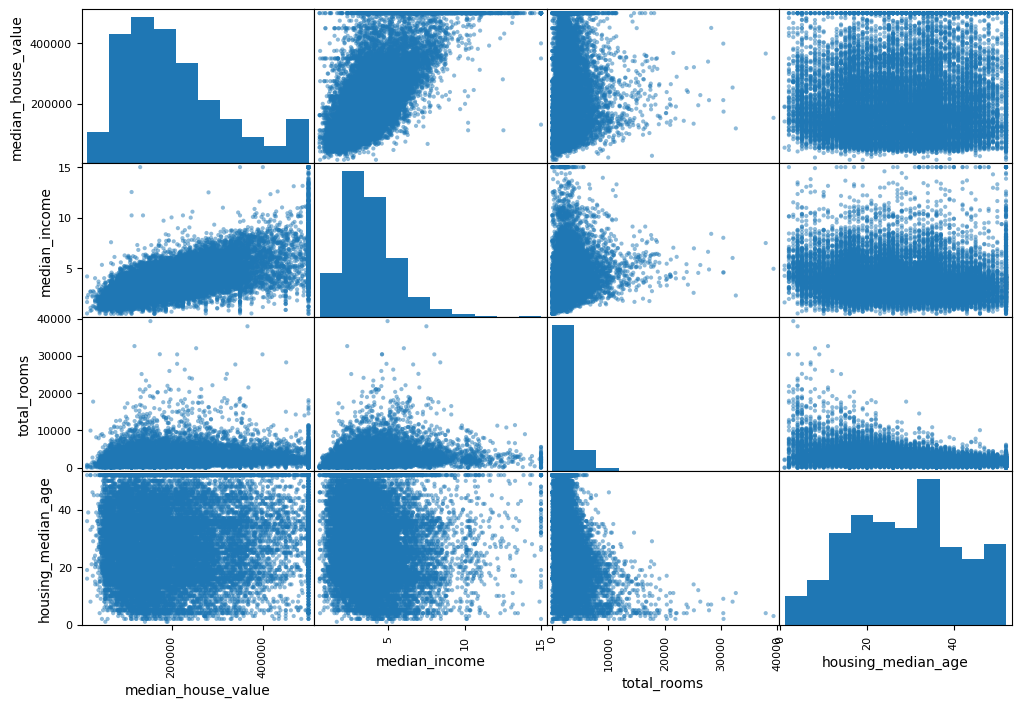

In [11]:
attributes_possibly_correlated = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(df[attributes_possibly_correlated], figsize=(12, 8))

In [12]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Handling missing values
option 1: housing.dropna(subset=["total_bedrooms"])  
option 2: housing.drop("total_bedrooms", axis=1)  
option 3: housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)  


In [13]:
# Option 4 Imputer 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [14]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### Scikit-Learn Design
1. Estimator: Can estimate parameters on a dataset using fit()
    - Hyperparameters must be set when constructing the estimator 
2. Some estimators can transform: Transform() takes a dataset and returns a transformed version using the learned parameters. 
3. Predictor: Estimators can predict a value using predict().
4. Inspection: All the estimator's hyperparameters can be inspected using accessors.
5. Nonproliferation of classes: Datasets are either NumPy arrays or SciPy sparse matrices. Hyperparameters are regular python strings or nums. 
6. Composition: Can create a pipeline of operations. For ex. an estimator pipeline can have a sequence of transformations with a final estimator.
7. Defaults: Most hyperparameters are set to a reasonable default value. 

When using ordinal encoder you are saying that the order of the categories is important.  
so category 1 and 2 are more similar than 1 and 3.  
This is not the case for the ocean proximity feature because category 1 is `<1h ocean` and category 4 is `NEAR OCEAN`.  
One hot encoding allows for one binary attribute for each category.   

In [15]:
# Handling categorical features
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])

In [16]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

If the categories are too many then creating one hot encoding will slow training and reduce performance.  
Options:
1. Replace the categorical feature with numerical features related to the category.
2. replace each category with a learnable low-dimensional vector called an embedding (representational learning).

Duck typing: it doesn't matter it is a duck as long as it quacks like a duck.
Scikit-Learn uses duck typing (for dynamic typed programming languages).
1. Create a class and implement fit(), transform(), and fit_transform() methods. 


In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
# TransformerMixin adds fit_transform() method
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ("attribs_adder", CombinedAttributesAdder()), ('std_scaler', StandardScaler())])

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [21]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [ 87601.25264261 303599.40299296 150469.99329512 189287.77736424
 254828.84887693]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [22]:
from sklearn.metrics import mean_squared_error 
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mrse = np.sqrt(lin_mse)
lin_mrse

np.float64(68336.29740487997)

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
print(np.sqrt(tree_mse))

0.0


### K-fold cross validation

Split the training set into k different folds. Use k-1 folds to train the model and 1 fold to evaluate the model.  
Repeat the process k times, using a different fold each time for validation.  
Report an array containing the 10 evaludation scores.

In [30]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)


Scores:  [69660.50185408 66246.84396006 66317.7863782  71259.73732804
 67064.31429431 71357.36679766 70608.48758386 69223.5142189
 64967.00375589 69311.13135203]
Mean:  68601.66875230275
Standard deviation:  2168.714952729732


### Fine tune
Use grid search to find the best combination of hyperparameters.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {
        "n_estimators": [3, 10, 30], 
        "max_features": [2, 4, 6, 8],
    },
    {
        "bootstrap": [False],
        "n_estimators": [3, 10], 
        "max_features": [2, 3, 4],
    }
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [35]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [36]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [37]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63037.76194751841 {'max_features': 2, 'n_estimators': 3}
54351.956166713346 {'max_features': 2, 'n_estimators': 10}
51898.40559255939 {'max_features': 2, 'n_estimators': 30}
58853.34093078012 {'max_features': 4, 'n_estimators': 3}
51212.21150873294 {'max_features': 4, 'n_estimators': 10}
48753.65725971599 {'max_features': 4, 'n_estimators': 30}
57727.5702818993 {'max_features': 6, 'n_estimators': 3}
50760.121769506295 {'max_features': 6, 'n_estimators': 10}
48501.71320724365 {'max_features': 6, 'n_estimators': 30}
57275.19504502705 {'max_features': 8, 'n_estimators': 3}
50882.07140681171 {'max_features': 8, 'n_estimators': 10}
48497.97585651253 {'max_features': 8, 'n_estimators': 30}
61400.01793655341 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53299.89929652299 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59072.90198209517 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51489.66425627804 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [38]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

### Compute confidence interval

In [40]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(
    stats.t.interval(
        confidence,
        len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors),
    )
)

array([44673.07275447, 48526.3832875 ])

In [1]:
sentence = 'Life is short, eat dessert first'
sorted(sentence.replace(',', '').split())

['Life', 'dessert', 'eat', 'first', 'is', 'short']